In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from glob import glob
from pathlib import Path
import cv2
from sklearn.decomposition import PCA
from tqdm.auto import tqdm

import sys
sys.path.append("../src/types/")
from parent_slide import *

In [11]:
IMG_DIR = '../../adipocyte_data/images_for_preview/'
IMG_20_DIR = os.path.join(IMG_DIR, '20x images')
IMG_40_DIR = os.path.join(IMG_DIR, '40x images')
IMG_60_DIR = os.path.join(IMG_DIR, '60x images')

In [12]:
input_files_20 = glob(IMG_20_DIR + '/input/*.tif')
input_files_40 = glob(IMG_40_DIR + '/input/*.tif')
input_files_60 = glob(IMG_60_DIR + '/input/*.tif')

target_files_20 = glob(IMG_20_DIR + '/targets/*.tif')
target_files_40 = glob(IMG_40_DIR + '/targets/*.tif')
target_files_60 = glob(IMG_60_DIR + '/targets/*.tif')

input_files_20, target_files_20

(['../../adipocyte_data/images_for_preview/20x images/input/AssayPlate_Greiner_#655090_D04_T0001F006L01A04Z03C04.tif',
  '../../adipocyte_data/images_for_preview/20x images/input/AssayPlate_Greiner_#655090_D04_T0001F006L01A04Z06C04.tif',
  '../../adipocyte_data/images_for_preview/20x images/input/AssayPlate_Greiner_#655090_D04_T0001F006L01A04Z02C04.tif',
  '../../adipocyte_data/images_for_preview/20x images/input/AssayPlate_Greiner_#655090_D04_T0001F006L01A04Z07C04.tif',
  '../../adipocyte_data/images_for_preview/20x images/input/AssayPlate_Greiner_#655090_D04_T0001F006L01A04Z04C04.tif',
  '../../adipocyte_data/images_for_preview/20x images/input/AssayPlate_Greiner_#655090_D04_T0001F006L01A04Z01C04.tif',
  '../../adipocyte_data/images_for_preview/20x images/input/AssayPlate_Greiner_#655090_D04_T0001F006L01A04Z05C04.tif'],
 ['../../adipocyte_data/images_for_preview/20x images/targets/AssayPlate_Greiner_#655090_D04_T0001F006L01A01Z01C01.tif',
  '../../adipocyte_data/images_for_preview/20

In [13]:
%%time
s = SlideImage.fromFiles(input_files_20)
s.img.shape

CPU times: user 202 ms, sys: 56.8 ms, total: 258 ms
Wall time: 257 ms


(2154, 2554, 7)

In [15]:
%%time
tiles = s.getTiles()
len(tiles)

CPU times: user 12.5 ms, sys: 8.27 ms, total: 20.8 ms
Wall time: 19.8 ms


621

In [20]:
%%time
p = SlideImage.fromTiles(tiles)
p.img.shape

CPU times: user 4.85 s, sys: 3.05 s, total: 7.9 s
Wall time: 7.91 s


(2154, 2554, 7)

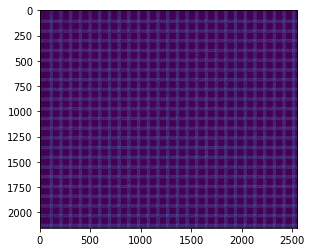

1

In [21]:
diff = np.abs(s.img-p.img)

plt.imshow(diff.sum(-1))
plt.show()

diff.max()